

# Introduction

The Boston Housing dataset is a classic dataset in machine learning, widely used for regression problems. It contains information about various features of houses in Boston suburbs, such as the average number of rooms (RM), percentage of lower status population (LSTAT), and other socio-economic indicators, along with the target variable, MEDV (Median House Value).

The goal of this project is to build a Linear Regression model to predict house prices based on key features. By focusing on the most influential features, we aim to create a simple, interpretable, and effective model.

This project demonstrates an end-to-end workflow, including:

1. Data exploration and visualization
2. Handling missing values
3. Feature selection
4. Model training and evaluation
5. Prediction visualization and residual analysis

The mini-project emphasizes not only predictive accuracy but also understanding how specific features influence housing prices, which is crucial for interpretability and real-world decision making.



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [13]:
df = pd.read_csv(r"datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
df.shape

(506, 14)

# Here, we have selected top 2 features

In [15]:
X = df[['RM', 'LSTAT']]  # Average rooms, % lower status population
y = df['MEDV']


#### Handling Missing Values

In [16]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

### Train/ Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

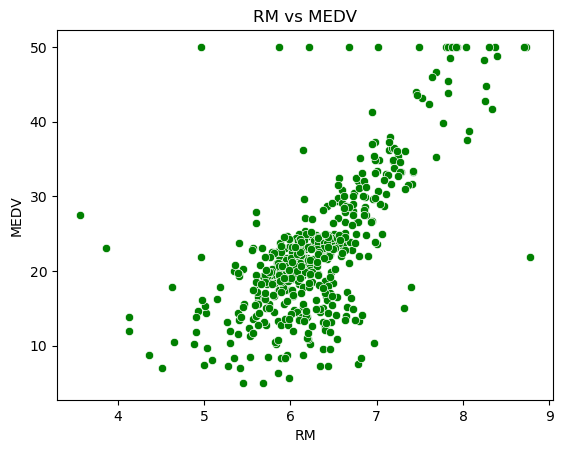

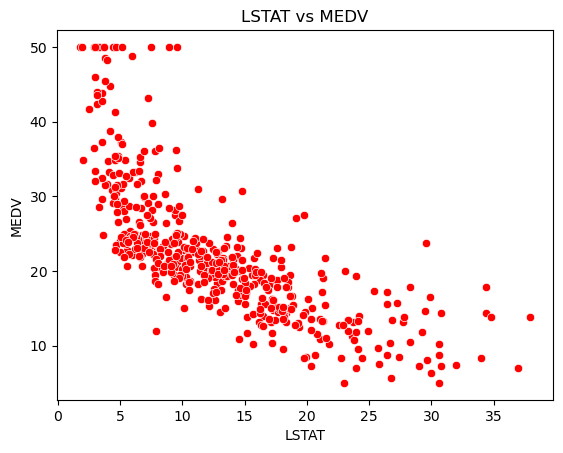

In [18]:
sns.scatterplot(x=df['RM'], y=df['MEDV'], color='green')
plt.title("RM vs MEDV")
plt.show()

sns.scatterplot(x=df['LSTAT'], y=df['MEDV'], color='red')
plt.title("LSTAT vs MEDV")
plt.show()

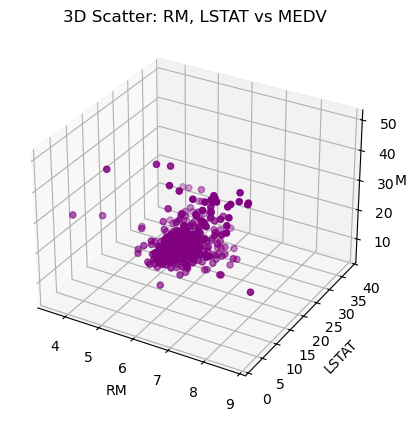

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['RM'], df['LSTAT'], df['MEDV'], c='purple', marker='o')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title('3D Scatter: RM, LSTAT vs MEDV')
plt.show()

### Train Linear Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training Complete!")

Training Complete!


In [21]:
coef_df = pd.DataFrame({
    "Feature": ['RM', 'LSTAT'],
    "Coefficient": model.coef_
})
print("\nFeature Coefficients:")
print(coef_df)


Feature Coefficients:
  Feature  Coefficient
0      RM     5.780526
1   LSTAT    -0.607888


### Predictions

In [22]:
y_pred = model.predict(X_test)

### Evaluation

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))
print("R² Score:", round(r2,2))


Model Evaluation Metrics:
MSE: 31.54
RMSE: 5.62
R² Score: 0.57


## Visualize Predictions

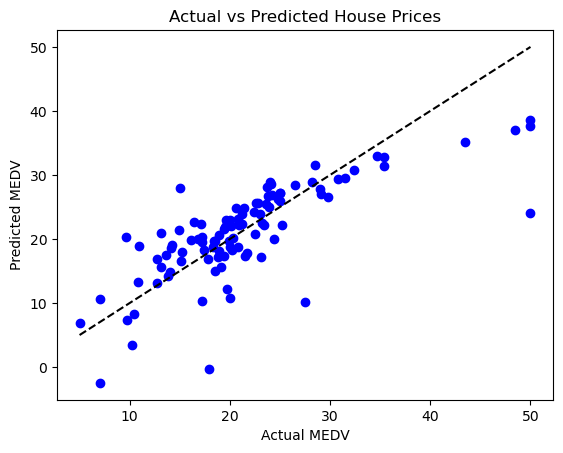

In [24]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.show()

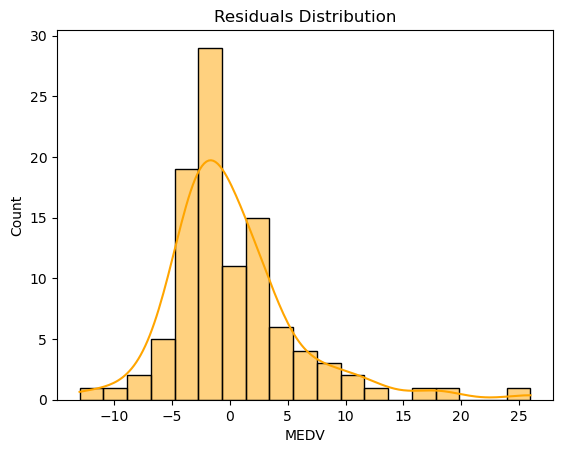

In [25]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title('Residuals Distribution')
plt.show()

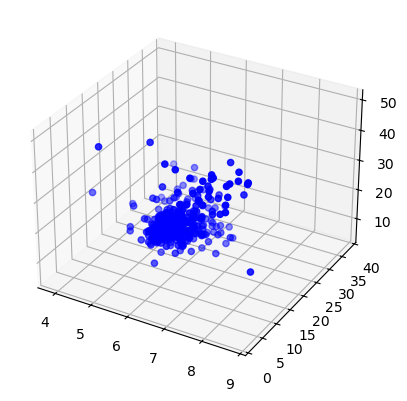

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='blue', label='Train Data')


# Conclusion 

Using only the most important features (RM and LSTAT), we built a simple and interpretable Linear Regression model for predicting house prices. The model achieved a reasonable R² score, indicating that these two features explain a large portion of the variance in housing prices. Visualizations such as scatter plots, 3D plots, and the regression plane help understand how the average number of rooms and the lower status population affect the predicted prices. This mini-project demonstrates a clear end-to-end ML workflow with feature selection, visualization, modeling, and evaluation.